In [9]:
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import DecisionBoundaryDisplay

# import seaborn as sns
# print(sklearn.__version__)

,count,mean,std,min,25%,50%,75%,max
0,300.0,0.070557,1.300079,-2.502172,-1.00122,-0.116901,1.041322,3.042371
1,300.0,0.051195,1.138429,-3.401359,-0.85871,0.379268,0.987180,1.836061


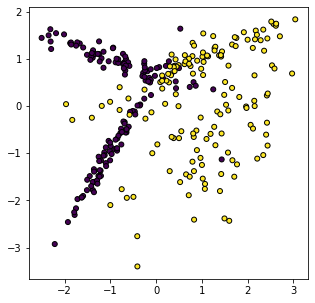

In [10]:
# dataset generation
FEATURES = 2
CLASSES = 2

X1, Y1 = sklearn.datasets.make_classification(
    n_samples = 300,
    n_features = FEATURES,
    n_informative = FEATURES,
    n_redundant = 0,
    n_repeated = 0,
    n_classes = CLASSES
)

# vizualization
plt.figure(figsize=(5, 5))
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

# data inspection
origin_df = pd.DataFrame(X1)
origin_df.describe().T

# variation of vizualization with seaborn
# sns.scatterplot(data=X1, markers={0: '', 1: 'x'})

In [11]:
# data spliting and scaling
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [12]:
knn_hyperparams = [
    [3, 'uniform', 'minkowski'],     
    [4, 'uniform', 'cityblock'],
    [3, 'uniform', 'cosine'],     
    [5, 'uniform', 'euclidean'],
    [7, 'uniform', 'haversine'],
    [4, 'uniform', 'l1'],
    [3, 'uniform', 'l2'],     
    [5, 'uniform', 'manhattan'],
    [7, 'uniform', 'nan_euclidean'],

    [3, 'distance', 'minkowski'],     
    [4, 'distance', 'cityblock'],
    [3, 'distance', 'cosine'],     
    [5, 'distance', 'euclidean'],
    [7, 'distance', 'haversine'],
    [4, 'distance', 'l1'],
    [3, 'distance', 'l2'],     
    [5, 'distance', 'manhattan'],
    [7, 'distance', 'nan_euclidean'],

]

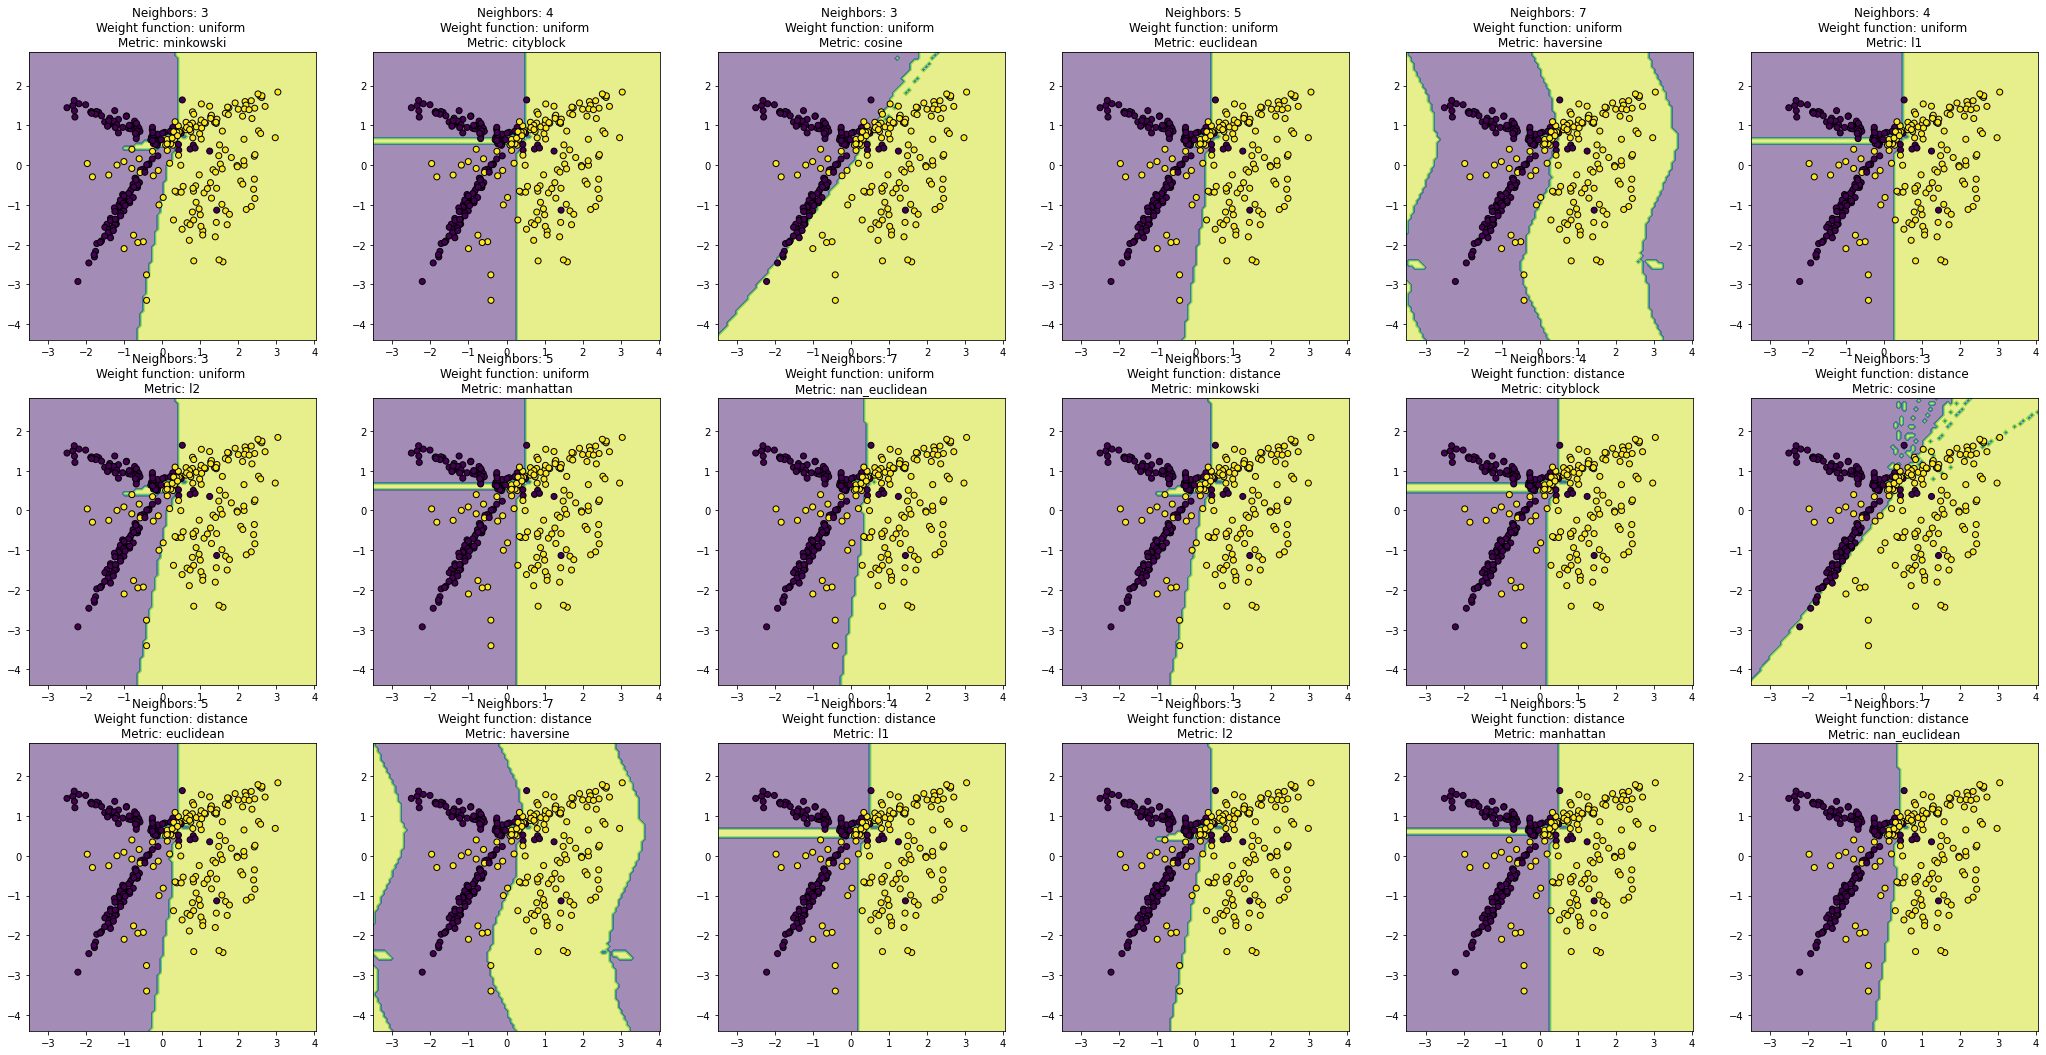

In [23]:
ax_raws, ax_columns = 3, 6
fig, (ax) = plt.subplots(ax_raws, ax_columns, figsize=(36, 18))


for knn_iteration, knn_data in enumerate(knn_hyperparams):
    if knn_iteration >= ax_columns:
        raw = knn_iteration // ax_columns 
        column = knn_iteration - ax_columns * raw
    else:
        raw = 0
        column = knn_iteration

    knn = KNeighborsClassifier(n_neighbors=knn_data[0], weights=knn_data[1], metric=knn_data[2]).fit(X_train_scaled, Y_train)
    # knn_dists = KNeighborsClassifier.kneighbors(knn, n_neighbors=knn_data[0], return_distance=True)

    # vizualization
    ax[raw, column].set_title(f'Neighbors: {knn_data[0]} \nWeight function: {knn_data[1]} \nMetric: {knn_data[2]}')
    disp = DecisionBoundaryDisplay.from_estimator(
        knn, X1, response_method="predict",
        alpha=0.5, ax = ax[raw, column]
    )
    disp.ax_.scatter(X1[:, 0], X1[:, 1], c=Y1, edgecolor="k")